## Part 1: basics

In Python we work a lot with imported packages (for which you need internet access). 
Numpy (imported as np) and matplotlib (imported as plt) are mandatory. 
There is a myriad of useful and commonly used packages, another common one is scipy. When we venture more into machine learning/deep RL, scikit-learn, torch and/or tensorflow are commonly used.

In [1]:
# Imports
import numpy as np                 
import matplotlib.pyplot as plt

If you know any programming language, Python will be straightforward to learn. It is useful to know how to define, operate on, and print variables, and how to use for-loops and if-statements.

It is also great to know how to use functions and more sophisticated applications are often implemented in an object-oriented way. 

Depending on the level of expertise and interest, we can look into these things in more detail in future sessions.

In [2]:
# @title Basic Operations

In [14]:
# define, operate on and print variables
print("Hello world")
v = "Hello world"
print(v)

day = 19
year = 2022

print(v + ", the first seminar was on " + str(day) + "th of April " + str(year) + ".")

# basic operations are (quite intuitively) +,-,/,*,**
print("The next seminar is on " + str(day+7) + "th of April " + str(year) + ".")

Hello world
Hello world
Hello world, the first seminar was on 19th of April 2022.
The next seminar is on 26th of April 2022.


In [4]:
# @title For-loops

For-loops are very useful and quite straightforward. Keep in mind that Python starts counting at 0!

In [5]:
# Check out for-loops:
n_steps = 100

time_steps = np.arange(n_steps)

v = np.zeros(n_steps)

for iter in time_steps:
  v[iter] = iter**(iter*0.01) # indent is crucial

  if iter%10 == 0:
    print('Time step ' + str(iter) + ' of ' + str(n_steps) + ' done.') 

Time step 0 of 100 done.
Time step 10 of 100 done.
Time step 20 of 100 done.
Time step 30 of 100 done.
Time step 40 of 100 done.
Time step 50 of 100 done.
Time step 60 of 100 done.
Time step 70 of 100 done.
Time step 80 of 100 done.
Time step 90 of 100 done.


In [6]:
# @title Plotting

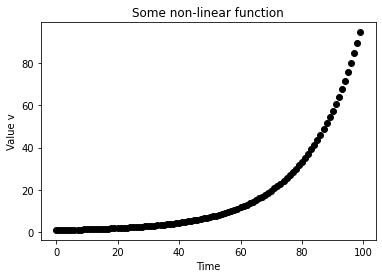

In [7]:
# plot
# also useful to check out plt.imshow, plt.bar, plot.boxplot, plt.errorbar etc etc
plt.figure()
plt.title('Some non-linear function')
plt.xlabel('Time')
plt.ylabel('Value v')
plt.plot(time_steps,v,'ko')
plt.show()

In [8]:
# @title If-statements

If-statements are also useful, let's use one to define a piece-wise function

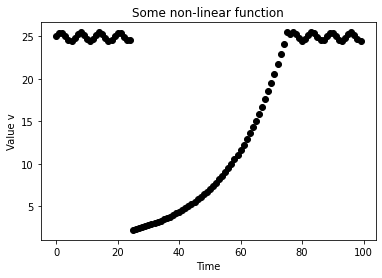

In [9]:
#  if-statements:
n_steps = 100

time_steps = np.arange(n_steps)

v = np.zeros(n_steps)

for iter in time_steps:
  if iter<n_steps/4 or iter>n_steps*0.75:
    v[iter] = (25 + 0.5*np.sin(iter)) # indent is crucial
  else:
    v[iter] = iter**(iter*0.01) # indent is crucial

plt.figure()
plt.title('Some non-linear function')
plt.xlabel('Time')
plt.ylabel('Value v')
plt.plot(time_steps,v,'ko')
plt.show()

In [10]:
# @title Functions

It is also really good to implement modular coding and use functions, esp. when re-using bits of code.
For example, note that above we copied and pasted our plotting commands as well as the the computations for v. It would be much easier to implement those as functions.

In [11]:
# Let's define the plotting function:

def plot_vals(time_x,value_y,title_plot="Some non-linear function",x_lab="Time",y_lab="Value v",plt_type='ko'):
  plt.figure()
  plt.title(title_plot)
  plt.xlabel(x_lab)
  plt.ylabel(y_lab)
  plt.plot(time_x,value_y,plt_type)
  plt.show()

In [12]:
def our_sin(input_val,vert_shift=25,ampl=0.5):
  return (vert_shift + ampl*np.sin(iter))

In [13]:
#@title try to define the second function as our_exp() yourself!

def our_exp(input_val,scale_par=0.01):
  return input_val**(input_val*0.01)

Now we can do the same as before but using functions:

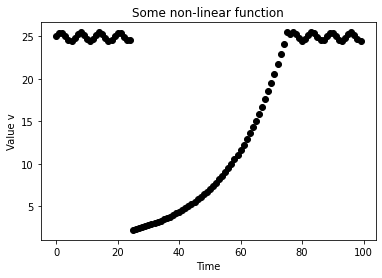

In [14]:
#  if-statements are also useful, let's use it to devine a piece-wise function

n_steps = 100

time_steps = np.arange(n_steps)

v = np.zeros(n_steps)

for iter in time_steps:
  if iter<n_steps/4 or iter>n_steps*0.75:
    v[iter] = our_sin(iter) # indent is crucial
  else:
    v[iter] = our_exp(iter) # indent is crucial

plot_vals(time_steps,v)

## Part 2: Some (very) basic RL - learn the value of an action

If you understand the above code that's a great start. Now let's model the behaviour of this chicken here:

Video available at https://www.youtube.com/watch?v=OQtVYlkia_YOQtVYlkia_Y


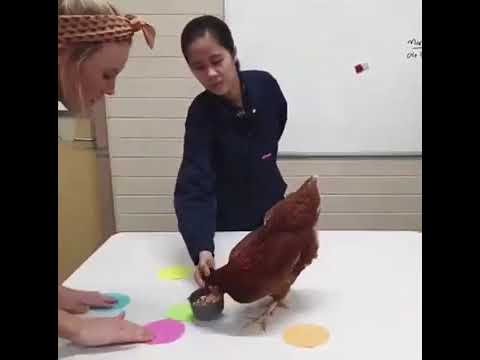

In [15]:
# @title Video: RL in action
from IPython.display import YouTubeVideo
video = YouTubeVideo(id='OQtVYlkia_Y', width=554, height=380, fs=1)
print("Video available at https://www.youtube.com/watch?v=OQtVYlkia_Y" + video.id)
video

In [16]:
# @title Value of an action

We've seen that we can define a simple step-wise update rule to account for reward-based learning.

Here, a chicken learns that picking the pink option is valuable. We can write this as an (overly simplistic!) update rule:

$$V(PinkCircle)_{t+1}=V(PinkCircle)_{t}+\alpha(r-V(PinkCircle)_{t})$$

This means we need to specify a learning rate $\alpha$ and a reward value. We also need to initialise $V(PinkCircle)$.

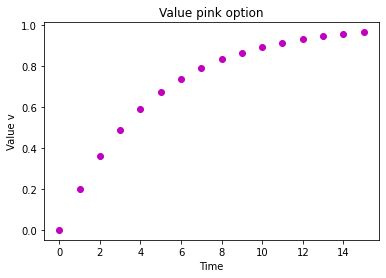

In [17]:
# chicken learns that picking the pink option is valuable

# initiate the learning rate: this should neither be too high nor too low
# often, it should decrease over time
alpha = 0.2

# let's assume that 1 food item yields a reward of 1
r = 1

n_steps = 16 # the chicken makes 15 choices (and obtains 15 rewards)

# we initialise the value of choosing the pink option as 0.5 (think of this as a 'go' bias)
# (initial values are important in more complicated examples)
v     = np.zeros(n_steps)
v[0:] = 0.5

for iter in np.arange(n_steps-1):
  v[iter+1] = v[iter] + alpha * (r - v[iter])

plot_vals(np.arange(n_steps),v,"Value pink option","Time","Value v",'mo')

In [18]:
# @title Value of an action and action selection

However, the chicken actually also has alternative options (5 in the end). This means it has to translate values for picking a particular option into actions.

How might this work? A straightforward idea would be to always pick the option with the highest value. This provides an accurate description of the chicken's behaviour, but we will see that this isn't going to work very well in general.

Chosen option: 0
Chosen option: 0
Chosen option: 0
Chosen option: 0
Chosen option: 0
Chosen option: 0
Chosen option: 0
Chosen option: 0
Chosen option: 0
Chosen option: 0
Chosen option: 0
Chosen option: 0
Chosen option: 0
Chosen option: 0
Chosen option: 0


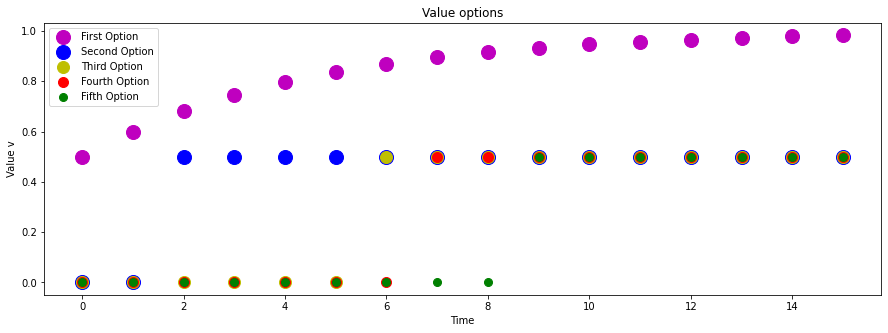

In [21]:
# chicken learns that picking the pink option is valuable
# However:
# We now also account for (up to) 5 alternative options
# we introduce an option for action selection by choosing the option with highest value

# initiate the learning rate: this should neither be too high nor too low
# often, this should decrease over time
alpha = 0.2

# let's assume that 1 food item at a reward of 1
r = 1

n_steps = 16 # the chicken makes 15 choices (and obtains 15 rewards)

n_options = 5

TS_0 = 0 # time setp when first option is introduced (note we start counting at 0)
TS_1 = 2 
TS_2 = 6
TS_3 = 7
TS_4 = 9

# we initialise the value of choosing an option as 0.5 (think of this as a 'go' bias)
# (initial values are important in more complicated examples)
v = np.zeros((n_steps,n_options))
v[TS_0:,0] = 0.5
v[TS_1:,1] = 0.5
v[TS_2:,2] = 0.5
v[TS_3:,3] = 0.5
v[TS_4:,4] = 0.5

for iter in np.arange(n_steps-1):
  pick_option = np.argmax(v[iter,:])
  print("Chosen option: " + str(pick_option))

  v[iter+1,pick_option] = v[iter,pick_option] + alpha * (r - v[iter,pick_option])

plt.rcParams['figure.figsize'] = [15, 5]
plt.figure()
plt.title("Value options")
plt.xlabel("Time")
plt.ylabel("Value v")
plt.plot(np.arange(n_steps),v[:,0],'mo',markersize=14,label="First Option")
plt.plot(np.arange(n_steps),v[:,1],'bo',markersize=14,label="Second Option")
plt.plot(np.arange(n_steps),v[:,2],'yo',markersize=12,label="Third Option")
plt.plot(np.arange(n_steps),v[:,3],'ro',markersize=10,label="Fourth Option")
plt.plot(np.arange(n_steps),v[:,4],'go',markersize=8,label="Fifth Option")
plt.legend()
plt.show()

Can you tell what's going on in this plot?

## Part 3 Rescorla-Wagner Learning and Blocking

We've seen a very simple example of a Rescorla-Wagner model above. More generally, let's assume a light (conditioned stimulus, CS) is paired with a reward (unconditioned stimulus, US), defined as three juice drops in our example. Then the associative strength of the CS and US is learned according to:

$$V_L \leftarrow V_L+\alpha\cdot(r-V_L) \tag{1} $$ 

$V_L$ is the value of light, and $r$ is a reward signal (3 drops of juice). The value of the CS converges onto the value of the US, and the convergence rate depends on the learning rate and the consistency of the CS-US pairing:

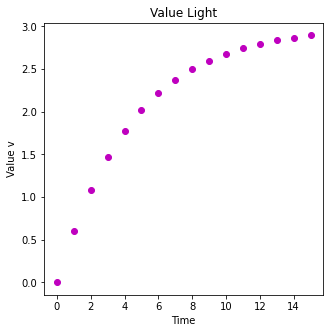

In [24]:
# Light (CS) is paired with 3 juice drops (US)

# initiate the learning rate: this should neither be too high nor too low
# often, it should decrease over time
alpha = 0.2

# let's assume that 1 food item yields a reward of 1
r = 3

n_steps = 16 # the animal observes 15 pairings of CS and US

# we initialise the value of the light as 0 (note this is different from the 'go' bias above)
# (initial values are important in more complicated examples)
v     = np.zeros(n_steps)

for iter in np.arange(n_steps-1):
  v[iter+1] = v[iter] + alpha * (r - v[iter])

plt.rcParams['figure.figsize'] = [5, 5]
plot_vals(np.arange(n_steps),v,"Value Light","Time","Value v",'mo')

Now, let's assume the light is consistently paired with a second CS, a tone. Let's further assume that

$$V_{LA} = V_L + V_A \tag{2} $$

That is, the aggregate associate strength of the paired light and sound is the sum of the individual associate srengths (this is obviously a strong assumption).

Thus:

$$V_{LA} \leftarrow V_{LA}+\alpha\cdot(r-V_{LA})=V_L + V_A+\alpha\cdot(r-(V_L + V_A)) \tag{3} $$


For simplicity, let's assume that the prediction error weighted by the learning rate $\alpha\cdot(r-(V_L + V_A))$ is attributed equally to $V_L$ and $V_A$, i.e.:

$$\Delta V_L = (\alpha\cdot(r-(V_L + V_A))) \cdot \frac{1}{2} \tag{4} $$

Can you implement blocking using Rescorla-Wagner learning? Hints:
- Use the single value association learning code for the light above
- Add a second value for the sound
- Define a time step when this second option is introduced (you can increase n_steps for better visibility)
- During the learning, use an if-statement that implements single association learning (as in 1) for when 'iter' is smaller than the time step when the second option is introduced, and combined learning (as in 3 and 4) when both actions are present.
- Change the timing of when the second option is introduced to see different levels of blocking

If you're stuck, you can also check the partial solution code below (blanks for when you have to fill in code) or the full solution code - but ideally start writing your own code!

In [ ]:
# A Rescorla-Wagner model of blocking
# Light (CS_2) is paired with 3 juice drops (US)
# After some time, a sound (CS_2) is consistently paired with the light

#  write code here...

In [41]:
# @title Partial Solution
# A Rescorla-Wagner model of blocking
# Light (CS_2) is paired with 3 juice drops (US)
# After some time, a sound (CS_2) is consistently paired with the light

# Initiate the learning rate: this should neither be too high nor too low
# often, this should decrease over time
alpha = 0.2

# let's assume that 1 food item at a reward of 1
r = 3

n_steps = 50 # the chicken makes 15 choices (and obtains 15 rewards)

n_options = 2

# Try different values for different degrees of blocking:
# TS_A = 2 # time setp when second CS (sound) is introduced
# TS_A = 10 # time setp when second CS (sound) is introduced
TS_A = 20 # time setp when second CS (sound) is introduced

# we initialise the value of choosing an option as 0.5 (think of this as a 'go' bias)
# (initial values are important in more complicated examples)
v_L     = np.zeros(n_steps)
v_A     = np.zeros(n_steps)

#####
# uncomment and fill in the blanks:
#####
# for iter in np.arange(n_steps-1):

  # if iter>=TS_A:
    # prediction_error = ...
    # v_L[iter+1] = ...
    # v_A[iter+1] = ...
  # else:
    # prediction_error = (r - v_L[iter])
    # v_L[iter+1] = ...

# plt.rcParams['figure.figsize'] = [15, 5]
# plt.figure()
# plt.title("Value options")
# plt.xlabel("Time")
# plt.ylabel("Value v")
# plt.plot(np.arange(n_steps),v_L,'mo',markersize=14,label="Light")
# plt.plot(np.arange(n_steps),v_A,'bo',markersize=14,label="Sound")
# plt.legend()
# plt.show()

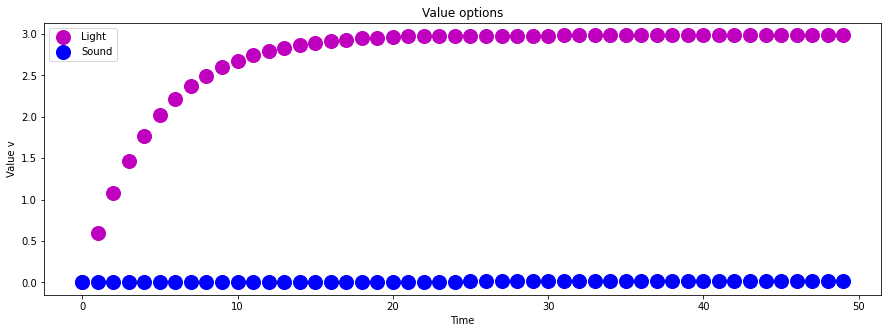

In [43]:
# @title Full Solution
# A Rescorla-Wagner model of blocking
# Light (CS_2) is paired with 3 juice drops (US)
# After some time, a sound (CS_2) is consistently paired with the light

# Initiate the learning rate: this should neither be too high nor too low
# often, this should decrease over time
alpha = 0.2

# let's assume that 1 food item at a reward of 1
r = 3

n_steps = 50 # the chicken makes 15 choices (and obtains 15 rewards)

n_options = 2

# Try different values for different degrees of blocking:
# TS_A = 2 # time setp when second CS (sound) is introduced
# TS_A = 10 # time setp when second CS (sound) is introduced
TS_A = 20 # time setp when second CS (sound) is introduced

# we initialise the value of choosing an option as 0.5 (think of this as a 'go' bias)
# (initial values are important in more complicated examples)
v_L     = np.zeros(n_steps)
v_A     = np.zeros(n_steps)

for iter in np.arange(n_steps-1):

  if iter>=TS_A:
    prediction_error = (r - (v_L[iter]+v_A[iter]))
    v_L[iter+1] = v_L[iter] + (alpha * prediction_error) * 0.5
    v_A[iter+1] = v_A[iter] + (alpha * prediction_error) * 0.5
  else:
    prediction_error = (r - v_L[iter])
    v_L[iter+1] = v_L[iter] + alpha * prediction_error

plt.rcParams['figure.figsize'] = [15, 5]
plt.figure()
plt.title("Value options")
plt.xlabel("Time")
plt.ylabel("Value v")
plt.plot(np.arange(n_steps),v_L,'mo',markersize=14,label="Light")
plt.plot(np.arange(n_steps),v_A,'bo',markersize=14,label="Sound")
plt.legend()
plt.show()